In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import cv2
from scipy.fft import fft, ifft, fftfreq, fft2, fftshift, ifft2, dct, ifftshift
from scipy import signal, fftpack
from scipy.ndimage import uniform_filter,gaussian_filter, median_filter
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import imutils

In [2]:
%config Completer.use_jedi = False

### C.1 

/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_90269/2197679340.py:12: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.angle(imgfftshift)), cmap="gray")
/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_90269/2197679340.py:12: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(np.angle(imgfftshift)), cmap="gray")


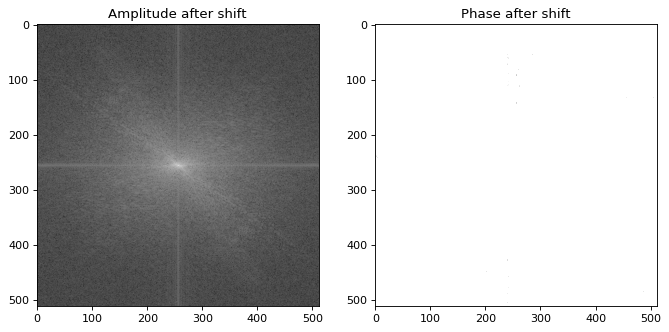

In [3]:
path = "lenaG.bmp"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
imgfft = fft2(img)
fig = plt.figure(figsize=(10,10), dpi=80)

imgfftshift = fftshift(imgfft)
fig.add_subplot(1, 2, 1)
plt.title("Amplitude after shift")
plt.imshow(np.log(abs(imgfftshift)), cmap="gray")
fig.add_subplot(1, 2, 2)
plt.title("Phase after shift")
plt.imshow(np.log(np.angle(imgfftshift)), cmap="gray")

### C.2 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_90269/3152838571.py:14: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.angle(dct_img)), cmap="gray")


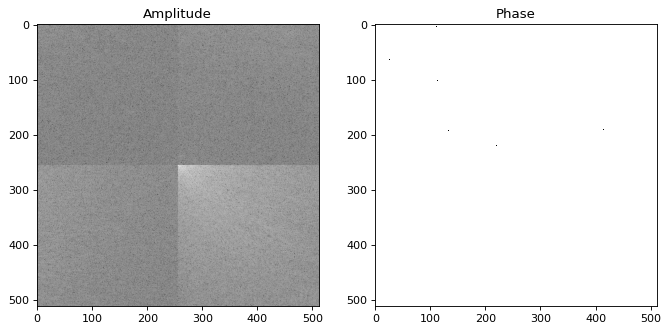

In [4]:
path = "lenaG.bmp"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
dct_img = fftshift(fftpack.dct(fftpack.dct(img.T, norm='ortho').T, norm='ortho'))
#dct_img = dct(img)
#im = np.uint8(dct_img)
print(np.imag(dct_img))

fig = plt.figure(figsize=(10,10), dpi=80)
fig.add_subplot(1, 2, 1)
plt.title("Amplitude")
plt.imshow(np.log(abs(dct_img)), cmap="gray")
fig.add_subplot(1, 2, 2)
plt.title("Phase")
plt.imshow(np.log(np.angle(dct_img)), cmap="gray")
#plt.imshow(dct_img, cmap="gray")

### C.3 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


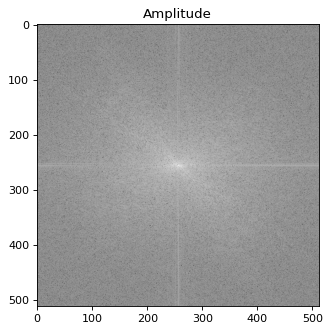

In [5]:
img_dht = np.real(imgfft) - np.imag(imgfft)
print(np.imag(img_dht))

imgfftshift = fftshift(img_dht)
fig = plt.figure(figsize=(10,10), dpi=80)
fig.add_subplot(1, 2, 1)
plt.title("Amplitude")
plt.imshow(np.log(abs(imgfftshift)), cmap="gray")
# fig.add_subplot(1, 2, 2)
# plt.title("Phase")
# plt.imshow(np.log(np.angle(imgfftshift)), cmap="gray")
#plt.imshow(img_dht)

### C.4

In [6]:
img_shape = img.shape

def matlab_style_gauss2D(shape,sigma):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(i-1.)/2. for i in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(np.square(x) + np.square(y)) / (2.*np.square(sigma)) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

gauss_filter = matlab_style_gauss2D(img_shape, 10)

def noisy_image(image, mean, sigma, shape):
    g_n = np.random.normal(mean, sigma, shape)
    g_n = g_n.reshape(shape)
    new_im = image + g_n
    return new_im

noise_image = noisy_image(img, 0, 20, img_shape)

#### Part A 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(512, 512)


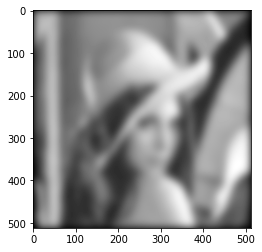

In [7]:
conv_img = signal.convolve2d(noise_image, gauss_filter, mode='same')
print(np.imag(conv_img))
print(conv_img.shape)
plt.imshow(conv_img, cmap="gray")

#### Part B 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


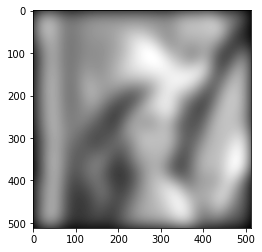

In [8]:
gauss_filter1 = matlab_style_gauss2D(img_shape, 20)
noise_image1 = noisy_image(img, 0, 30, img_shape)

conv_img1 = signal.convolve2d(noise_image1, gauss_filter1, mode='same')
print(np.imag(conv_img1))
plt.imshow(conv_img1, cmap="gray")

#### Part C 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


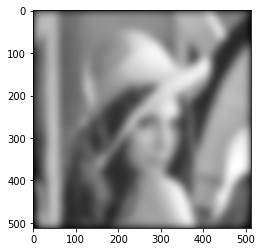

In [9]:
gauss_filter2 = matlab_style_gauss2D(img_shape, 5)
noise_image2 = noisy_image(img, 0, 3, img_shape)

conv_img2 = signal.convolve2d(noise_image2, gauss_filter, mode='same')
print(np.imag(conv_img2))
plt.imshow(conv_img2, cmap="gray")

### C.5 

#### C.4 A part 

[[ 0.00000000e+00  1.30445784e-15  1.33224052e-15 ... -3.50508332e-16
  -9.99254932e-16 -2.92848157e-15]
 [ 3.39919065e-15  6.23605985e-16  3.17706473e-15 ...  5.81774416e-15
   4.09688491e-15  4.06915644e-15]
 [ 6.93930048e-16  4.30265632e-16 -2.02612991e-15 ...  5.25989571e-15
   1.52650245e-15  4.92691012e-15]
 ...
 [-6.99256090e-15 -8.04721856e-15 -6.49306895e-15 ...  2.34070542e-15
  -2.81850925e-15 -7.04812626e-15]
 [-7.58080597e-16 -6.47139609e-16  2.90557407e-15 ...  6.18839595e-15
  -2.70105220e-15 -2.08710714e-15]
 [-2.11072665e-15 -5.24710670e-15 -4.99730652e-15 ...  5.33706566e-15
  -3.66177070e-15 -2.09331233e-15]]


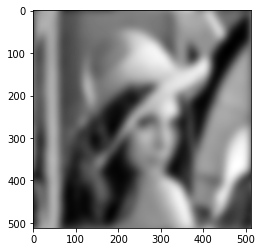

In [10]:
ns_im_fft = fft2(noise_image)
g_im_fft = fft2(gauss_filter)
row, col = ns_im_fft.shape

ifft_im = ifftshift(ifft2(ns_im_fft * g_im_fft))
plt.imshow(abs(ifft_im), cmap="gray")
print(np.imag(ifft_im))

#### C.4 B part 

[[ 0.00000000e+00 -3.09477379e-15  4.71844785e-16 ...  3.69641358e-15
  -6.38378239e-16 -3.70238271e-16]
 [ 5.60478313e-16 -3.13849424e-16  1.03240441e-15 ...  4.34962862e-15
   4.21592015e-16  1.70321902e-15]
 [-2.21177243e-16 -4.63428666e-15 -6.93022029e-16 ...  2.11018269e-15
  -2.28447386e-15  1.11903471e-15]
 ...
 [ 1.39010368e-15 -3.38382822e-15  5.78902652e-17 ... -7.02797961e-17
  -3.41193345e-15  1.30920213e-15]
 [ 1.07212619e-15  1.98800598e-15  1.07209909e-15 ...  2.46658747e-15
   1.70446747e-16 -2.11018658e-15]
 [-2.02752007e-15 -6.02432295e-15 -4.69197401e-15 ... -4.53649535e-15
   1.84459686e-15 -4.52525319e-16]]


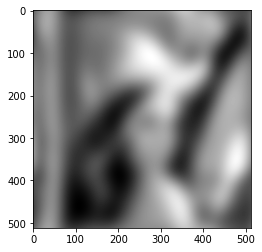

In [11]:
ns_im_fft1 = fft2(noise_image1)
g_im_fft1 = fft2(gauss_filter1)
row, col = ns_im_fft1.shape

ifft_im1 = ifftshift(ifft2(ns_im_fft1 * g_im_fft1))
plt.imshow(abs(ifft_im1), cmap="gray")
print(np.imag(ifft_im1))

#### C.4 C part 

[[ 0.00000000e+00 -2.16493490e-15 -2.59514632e-15 ...  2.72725364e-15
  -1.89798874e-15  3.96931565e-15]
 [-1.17270017e-15 -2.60906244e-15 -1.17963907e-15 ...  2.31422653e-15
  -5.76035259e-16  6.41646431e-16]
 [ 2.66800471e-15 -2.05042398e-15  6.69630367e-16 ...  5.62422268e-15
   3.41751231e-15  2.05396051e-15]
 ...
 [-5.62358265e-15 -3.89580135e-15 -5.42232762e-15 ... -5.68278696e-15
  -9.15239848e-15 -9.72848795e-15]
 [-2.35155659e-16  2.20733500e-15 -1.91436798e-15 ... -1.71674368e-15
  -6.06319397e-16  2.01685084e-15]
 [-2.15080897e-15 -4.71815016e-15 -5.63407950e-15 ...  4.96525838e-15
   1.60996310e-15 -5.76148004e-16]]


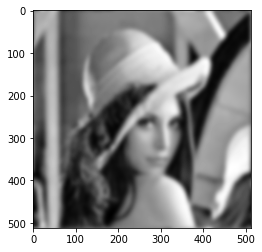

In [12]:
ns_im_fft2 = fft2(noise_image2)
g_im_fft2 = fft2(gauss_filter2)
row, col = ns_im_fft2.shape

ifft_im2 = ifftshift(ifft2(ns_im_fft2 * g_im_fft2))
plt.imshow(abs(ifft_im2), cmap="gray")
print(np.imag(ifft_im2))

### C.6 

#### Using C.4 method 

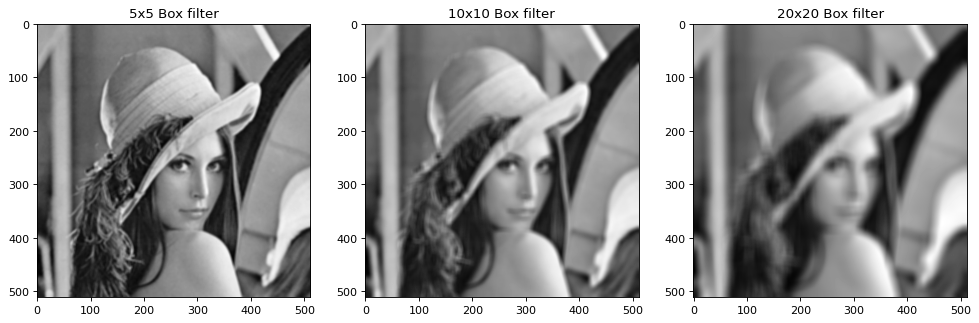

In [13]:
path = "lenaG.bmp"
lena_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
lena_img_shape = lena_img.shape
gauss_filter = matlab_style_gauss2D(img_shape, 5)
noise_image = noisy_image(lena_img, 0, 3, lena_img_shape)

avg_filter1 = cv2.boxFilter(noise_image, -1, (5, 5))
avg_filter2 = cv2.boxFilter(noise_image, -1, (10, 10))
avg_filter3 = cv2.boxFilter(noise_image, -1, (20, 20))

fig = plt.figure(figsize=(15,15), dpi=80)
fig.add_subplot(1, 3, 1)
plt.title("5x5 Box filter")
plt.imshow(avg_filter1, cmap="gray")
fig.add_subplot(1, 3, 2)
plt.title("10x10 Box filter")
plt.imshow(avg_filter2, cmap="gray")
fig.add_subplot(1, 3, 3)
plt.title("20x20 Box filter")
plt.imshow(avg_filter3, cmap="gray")

#### Using C.5 method 

### C.7 

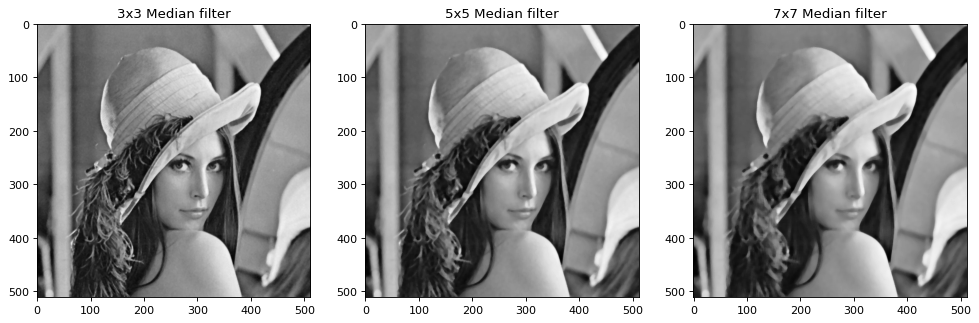

In [14]:
path = "lenaG.bmp"
lena_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
lena_img_shape = lena_img.shape
gauss_filter = matlab_style_gauss2D(img_shape, 5)
noise_image = noisy_image(lena_img, 0, 3, lena_img_shape)

med_filter1 = median_filter(noise_image, (3, 3))
med_filter2 = median_filter(noise_image, (5, 5))
med_filter3 = median_filter(noise_image, (7, 7))

fig = plt.figure(figsize=(15,15), dpi=80)
fig.add_subplot(1, 3, 1)
plt.title("3x3 Median filter")
plt.imshow(med_filter1, cmap="gray")
fig.add_subplot(1, 3, 2)
plt.title("5x5 Median filter")
plt.imshow(med_filter2, cmap="gray")
fig.add_subplot(1, 3, 3)
plt.title("7x7 Median filter")
plt.imshow(med_filter3, cmap="gray")

### C.8 

#### For C.4 part 

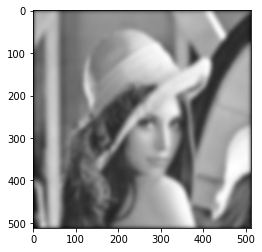

In [15]:
path = "lenaG.bmp"
lena_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
lena_img_shape = lena_img.shape

uni_filter = np.random.uniform(size=lena_img_shape)
uni_filter = uni_filter.reshape(lena_img_shape[0], lena_img_shape[1]).astype('uint8')
noise_image = cv2.add(lena_img, uni_filter)

gauss_filter = matlab_style_gauss2D(img_shape, 5)

conv_lena_img = signal.convolve2d(noise_image, gauss_filter, mode='same')
plt.imshow(conv_lena_img, cmap="gray")

#### For C.6 part 

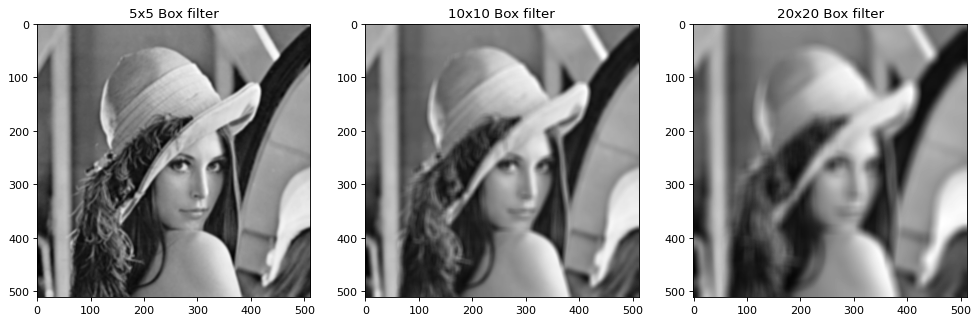

In [16]:
path = "lenaG.bmp"
lena_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
lena_img_shape = lena_img.shape

uni_filter = np.random.uniform(size=lena_img_shape)
uni_filter = uni_filter.reshape(lena_img_shape[0], lena_img_shape[1]).astype('uint8')
noise_image = cv2.add(lena_img, uni_filter)

avg_filter1 = cv2.boxFilter(noise_image, -1, (5, 5))
avg_filter2 = cv2.boxFilter(noise_image, -1, (10, 10))
avg_filter3 = cv2.boxFilter(noise_image, -1, (20, 20))

fig = plt.figure(figsize=(15,15), dpi=80)
fig.add_subplot(1, 3, 1)
plt.title("5x5 Box filter")
plt.imshow(avg_filter1, cmap="gray")
fig.add_subplot(1, 3, 2)
plt.title("10x10 Box filter")
plt.imshow(avg_filter2, cmap="gray")
fig.add_subplot(1, 3, 3)
plt.title("20x20 Box filter")
plt.imshow(avg_filter3, cmap="gray")

#### For C.7 part 

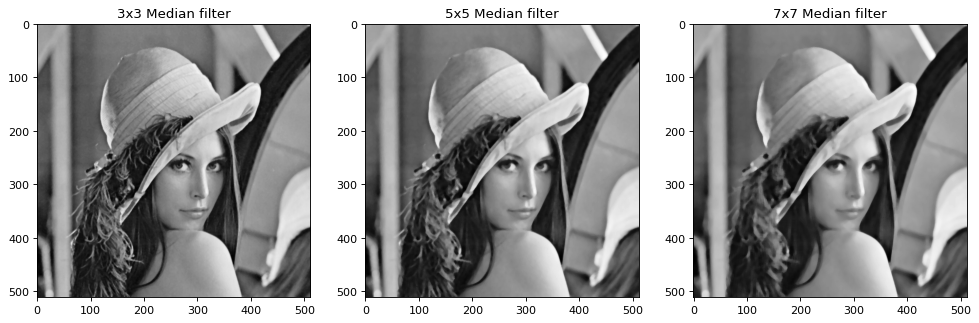

In [18]:
path = "lenaG.bmp"
lena_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
lena_img_shape = lena_img.shape

uni_filter = np.random.uniform(size=lena_img_shape)
uni_filter = uni_filter.reshape(lena_img_shape[0], lena_img_shape[1]).astype('uint8')
noise_image = cv2.add(lena_img, uni_filter)

med_filter1 = median_filter(noise_image, (3, 3))
med_filter2 = median_filter(noise_image, (5, 5))
med_filter3 = median_filter(noise_image, (7, 7))

fig = plt.figure(figsize=(15,15), dpi=80)
fig.add_subplot(1, 3, 1)
plt.title("3x3 Median filter")
plt.imshow(med_filter1, cmap="gray")
fig.add_subplot(1, 3, 2)
plt.title("5x5 Median filter")
plt.imshow(med_filter2, cmap="gray")
fig.add_subplot(1, 3, 3)
plt.title("7x7 Median filter")
plt.imshow(med_filter3, cmap="gray")